# RDS Homework 3 Template
## Spring 2022


In [37]:
!pip install shap

In [38]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Problem 3

### Part (A)

In [39]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [40]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer(min_df=10) # what is min_df : how many frequency lower then min_df is removed
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [41]:
# Train & fit the classifier
model = SGDClassifier(max_iter=1000, tol=0.01, loss='log')
model.fit(X_train, y_train)

predicted = model.predict(X_test)
sklearn.metrics.accuracy_score(predicted, y_test)

0.9246861924686193

### Part (B)

In [42]:
# Confusion Matrix
confusion_matrix(y_test, predicted) # tn, fp, fn, tp

array([[271,  48],
       [  6, 392]])

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)

True Negative:  271
False Positive:  48
False Negative:  6
True Positive:  392


#### Explainer

In [44]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# Apply it to the test data
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [45]:
# Select 5 documents in the test set for explanation
X_test_array = X_test.toarray()

shap.initjs()
idx = 0
print("Prediction: ", "Christian" if predicted[idx] else "Atheist")
print("Label: ", "Christian" if y_test[idx] else "Atheist")
#print(X_test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)


Prediction:  Christian
Label:  Christian


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [46]:
for i in range(0, len(predicted)):
  if predicted[i] == 1 and y_test[i] == 0:
    print(i)
    break

15


In [47]:
# Select 5 documents in the test set for explanation
X_test_array = X_test.toarray()

shap.initjs()
idx = 25
print("Prediction: ", "Christian" if predicted[idx] else "Atheist")
print("Label: ", "Christian" if y_test[idx] else "Atheist")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)


Prediction:  Christian
Label:  Atheist


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [48]:
# Select 5 documents in the test set for explanation
X_test_array = X_test.toarray()

shap.initjs()
idx = 2
print("Prediction: ", "Christian" if predicted[idx] else "Atheist")
print("Label: ", "Christian" if y_test[idx] else "Atheist")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)


Prediction:  Atheist
Label:  Atheist


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [49]:
# Select 5 documents in the test set for explanation
X_test_array = X_test.toarray()

shap.initjs()
idx = 1
print("Prediction: ", "Christian" if predicted[idx] else "Atheist")
print("Label: ", "Christian" if y_test[idx] else "Atheist")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)


Prediction:  Atheist
Label:  Christian


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [50]:
# Select 5 documents in the test set for explanation
X_test_array = X_test.toarray()

shap.initjs()
idx = 4
print("Prediction: ", "Christian" if predicted[idx] else "Atheist")
print("Label: ", "Christian" if y_test[idx] else "Atheist")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)


Prediction:  Atheist
Label:  Atheist


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


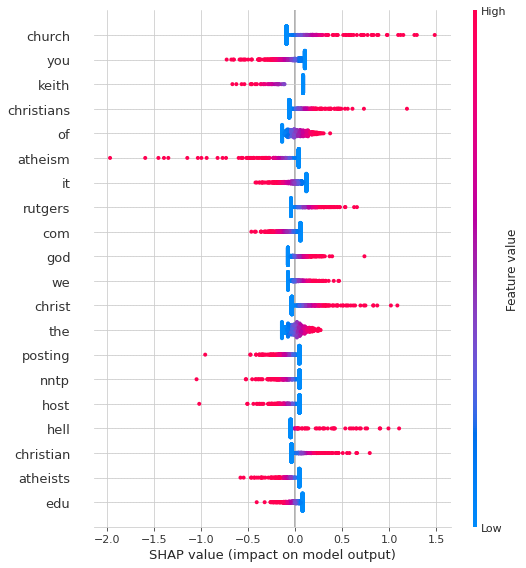

In [51]:
# Visually explain 5 documents selected from the test set
X_test_arr = X_test.toarray()
shap.summary_plot(shap_values, X_test_arr, feature_names=vectorizer.get_feature_names())

### Part (C)


#### Part (i)

In [52]:
# Compute the accuracy of the classifier and the number of misclassified documents
print('Accuracy: ', sklearn.metrics.accuracy_score(predicted, y_test))

Accuracy:  0.9246861924686193


In [53]:
cnt = 0
misclassified_indices = []
for i in range(0, len(y_test)):
  if predicted[i] != y_test[i]:
    cnt = cnt+1
    misclassified_indices.append(i)

print('the number of misclassified documents: ', cnt)

the number of misclassified documents:  54


1

In [71]:
model.predict_proba(X_test[0])[0]

array([0.43081918, 0.56918082])

#### Part (ii)

In [54]:
# Calculate conf_i for all misclassified documents
conf_is = []

for i in range(0, len(y_test)):
  if y_test[i] == 0:
    #print(model.predict_proba(X_test[i])[0])
    conf_is.append(abs(model.predict_proba(X_test[i])[0][1] - model.predict_proba(X_test[i])[0][0]))
    #conf_is.append(abs(X_test[i]))

In [68]:
conf_is

[0.9011219012882687,
 0.18605999220938424,
 0.47273478737406105,
 0.6188986750300003,
 0.540287682449458,
 0.04333508843342937,
 0.2041456377506768,
 0.8984647705252913,
 0.10397145323966028,
 0.17968384838100238,
 0.35318447369993367,
 0.8688481054152097,
 0.8954388048967101,
 0.5324147726187798,
 0.8836121854601315,
 0.9087131054562614,
 0.602996752957409,
 0.15762598208295792,
 0.8834457409656764,
 0.6262637258442199,
 0.7192659704372057,
 0.9246033421468705,
 0.3467602846922735,
 0.9736337419185384,
 0.579783238384161,
 0.8647556926808533,
 0.6749555409817494,
 0.8068094466845859,
 0.5544470612141967,
 0.8120813626716796,
 0.4347303135468636,
 0.7794707268897609,
 0.19110327647575126,
 0.8302151751245685,
 0.9028323310588706,
 0.11170619579623198,
 0.35000100350746544,
 0.8550038456422822,
 0.7253845835845232,
 0.7726877076791061,
 0.9765753552511622,
 0.6942955711440417,
 0.8654603683841884,
 0.18570156856763465,
 0.06529382116847593,
 0.1667450318292263,
 0.09478981695656147,
 0.

No handles with labels found to put in legend.


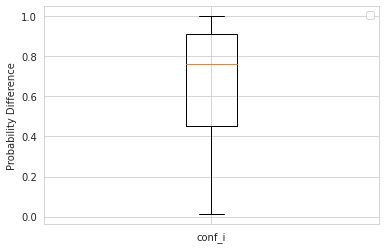

In [55]:
# Plot conf_i

plt.boxplot(conf_is, labels=['conf_i'])

plt.ylabel('Probability Difference')
plt.legend()
plt.show()

#### Part (iii)

In [56]:
# Identify tokens (word_j) that contributed to the misclassification of documents

feats = vectorizer.get_feature_names()
print('feats: ', feats)

fp_words = defaultdict(list)
fn_words = defaultdict(list)

for i in range(0, len(misclassified_indices)):

  idx = misclassified_indices[i]

  vals = shap_values[idx,:]
  positive_weights = defaultdict(float)
  negative_weights = defaultdict(float)

  for feat_i, val_i in zip(feats, vals):
    if val_i > 0: # christian
      positive_weights[feat_i] += val_i
    elif val_i < 0: # atheist
      negative_weights[feat_i] += val_i
  
  sorted_positives = dict(sorted(positive_weights.items(), key=lambda item: item[1], reverse=True)[:20])
  if predicted[idx] == 1:
    fp_words[idx] = sorted(sorted_positives.items(), reverse=True)

  sorted_negatives = dict(sorted(negative_weights.items(), key=lambda item: item[1])[:20])
  if predicted[idx] == 0:
    fn_words[idx] = sorted(sorted_negatives.items())


all_words = []

for idx in misclassified_indices:
  for item in fp_words[idx]:
    all_words.append(item)
  for item in fn_words[idx]:
    all_words.append(item)

print(len(all_words))


  #print(sorted_positives.values())
  #print(sorted_negatives)

  #if predicted[idx] == 1:
    
  






# idx = 6
# vals = shap_values[idx,:]
# positive_sentiment_weight = defaultdict(float)
# negative_sentiment_weight = defaultdict(float)
# feats = vectorizer.get_feature_names()

# for feat_i, val_i in zip(feats, vals):
#   if val_i > 0:
#     positive_sentiment_weight[feat_i] += val_i
#   elif val_i < 0:
#     negative_sentiment_weight[feat_i] += val_i

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


feats:  ['00', '000', '01', '02', '03', '0358', '04', '05', '07', '08', '09', '10', '100', '11', '12', '127', '13', '14', '15', '16', '17', '18', '19', '1989', '1990', '1992', '1993', '1993apr14', '1993apr15', '1993apr3', '1993apr5', '1st', '20', '2000', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '30602', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3rd', '40', '408', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '542', '55', '56', '57', '58', '59', '5of5', '60', '70', '706', '7415', '90', '93', '_is_', '_not_', '_the', 'aa888', 'aaron', 'ability', 'able', 'abo', 'about', 'above', 'abraham', 'absence', 'absolute', 'absolutely', 'absolutes', 'abstinence', 'absurd', 'abuse', 'ac', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'according', 'account', 'accounts', 'accurate', 'achieve', 'acknowledge', 'acns', 'across', 'acs', 'act', 'action', 'actions', 'active', 'activities', 'activity', 

In [57]:
# Compute the number of documents (count_j) these words helped to misclassify

cntMap = defaultdict(int)

for i in range(0, len(all_words)):
  word, _ = all_words[i]
  cntMap[word] += 1

for word, cnt in cntMap.items():
  print('word: ', word,  '     count_j: ', cnt)

print(len(cntMap.items()))

word:  alt      count_j:  1
word:  an      count_j:  21
word:  argument      count_j:  1
word:  charge      count_j:  1
word:  christians      count_j:  10
word:  church      count_j:  13
word:  free      count_j:  3
word:  god      count_j:  13
word:  list      count_j:  3
word:  make      count_j:  1
word:  morality      count_j:  2
word:  of      count_j:  27
word:  on      count_j:  2
word:  or      count_j:  10
word:  people      count_j:  2
word:  policy      count_j:  1
word:  posting      count_j:  24
word:  religious      count_j:  1
word:  try      count_j:  1
word:  we      count_j:  16
word:  you      count_j:  24
word:  writes      count_j:  16
word:  university      count_j:  12
word:  this      count_j:  8
word:  students      count_j:  1
word:  schools      count_j:  1
word:  nntp      count_j:  29
word:  lot      count_j:  3
word:  keith      count_j:  48
word:  islam      count_j:  28
word:  host      count_j:  29
word:  general      count_j:  1
word:  future      cou

In [58]:
# Compute the sum of absolute SHAP values (weight_j) for each word_j

weightsMap = defaultdict(float)

for i in range(0, len(all_words)):
  word, weight = all_words[i]
  weightsMap[word] += abs(weight)

for word, total_weight in weightsMap.items():
  print('word: ', word, '     weight_j: ', total_weight)

print(len(weightsMap.items()))

word:  alt      weight_j:  0.22459883576534886
word:  an      weight_j:  1.1473438790799924
word:  argument      weight_j:  0.0903757620700476
word:  charge      weight_j:  0.08433253987516806
word:  christians      weight_j:  1.3496781616199236
word:  church      weight_j:  3.3533174407866047
word:  free      weight_j:  0.4020588102997245
word:  god      weight_j:  1.5083995001392196
word:  list      weight_j:  0.8509036372453846
word:  make      weight_j:  0.07571240302286376
word:  morality      weight_j:  0.7808479742846046
word:  of      weight_j:  3.623546988597374
word:  on      weight_j:  0.14450129355102548
word:  or      weight_j:  0.7680905707384444
word:  people      weight_j:  0.1545438204162885
word:  policy      weight_j:  0.12567539086691645
word:  posting      weight_j:  1.108556711835603
word:  religious      weight_j:  0.08613610065686385
word:  try      weight_j:  0.06863669134486622
word:  we      weight_j:  1.4805832721838703
word:  you      weight_j:  2.659940827

(array([284.,  18.,   9.,   4.,   4.,   5.,   0.,   1.,   0.,   1.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <a list of 10 Patch objects>)

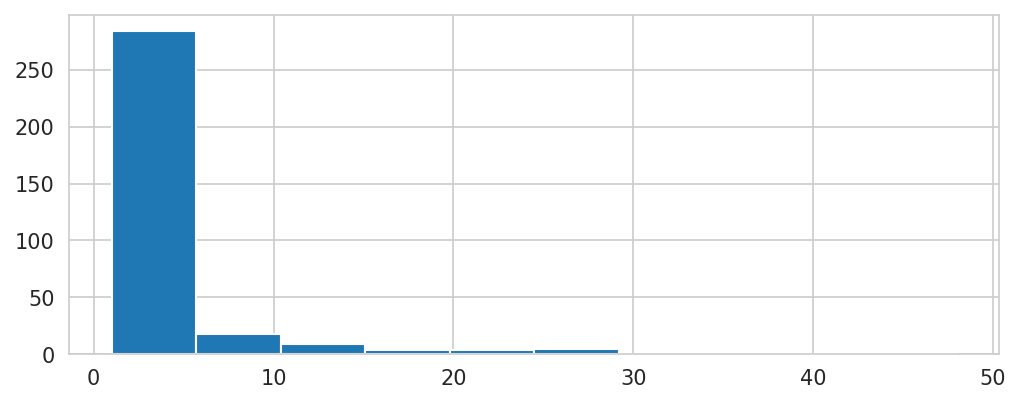

In [59]:
# TODO label
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(1, 1, figsize=(8,3), dpi=150)
axes.hist(cntMap.values())


(array([258.,  30.,  17.,  10.,   1.,   3.,   2.,   2.,   2.,   1.]),
 array([0.04062989, 0.43894327, 0.83725665, 1.23557003, 1.63388341,
        2.03219679, 2.43051017, 2.82882354, 3.22713692, 3.6254503 ,
        4.02376368]),
 <a list of 10 Patch objects>)

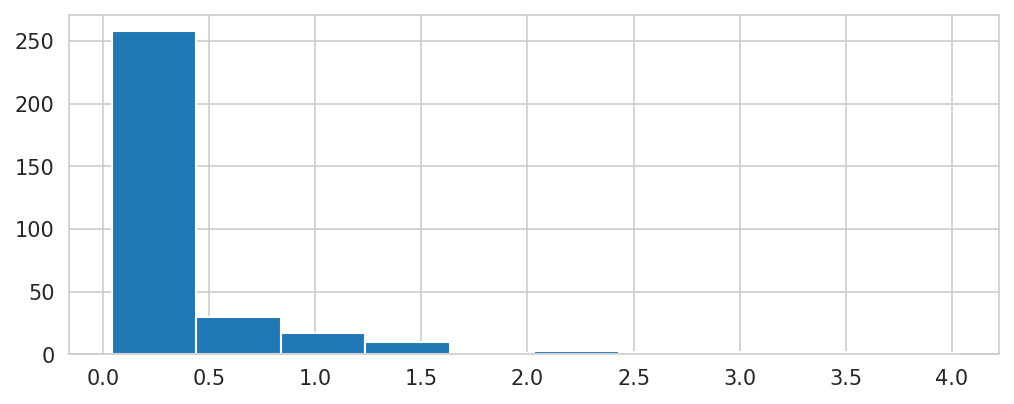

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(8,3), dpi=150)
axes.hist(weightsMap.values())


Text(0, 0.5, 'weight_j')

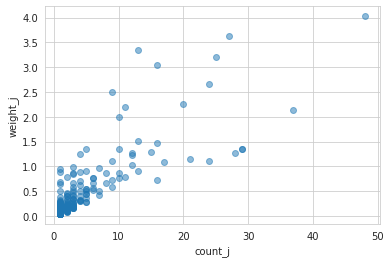

In [61]:
plt.scatter(cntMap.values(), weightsMap.values(), alpha=0.5)
plt.xlabel('count_j')
plt.ylabel('weight_j')

### Part (D)

In [62]:
#!pip install nltk

In [63]:
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# Implement a strategy for feature selection

improved_vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, ngram_range=(2,3), min_df=2)

X_train_improved = improved_vectorizer.fit_transform(newsgroups_train.data)
y_train_improved = newsgroups_train.target
X_test_improved = improved_vectorizer.transform(newsgroups_test.data)
y_test_improved = newsgroups_test.target

model_improved = SGDClassifier(max_iter=1000, tol=0.01, loss='log')
model_improved.fit(X_train_improved, y_train_improved)

predicted_improved = model_improved.predict(X_test_improved)
sklearn.metrics.accuracy_score(predicted_improved, y_test_improved)

0.9637377963737797

In [65]:
# Initialize the explainer and apply to test data
explainer_improved = shap.LinearExplainer(model_improved, X_train_improved, feature_perturbation="interventional")

# Apply it to the test data
shap_values_improved = explainer_improved.shap_values(X_test_improved)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [77]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection

misclassified_set = set(misclassified_indices)

for i in range(0, len(y_test_improved)):
  if predicted_improved[i] == y_test_improved[i]:
    if i in misclassified_set:
      print(i)      
      break

X_test_improved_arr = X_test_improved.toarray()

shap.initjs()
idx = i
print("Christian" if predicted_improved[idx] else "Atheist")
print(X_test_improved[idx])
shap.force_plot(
    explainer_improved.expected_value, shap_values_improved[idx,:], X_test_improved_arr[idx,:],
    feature_names=improved_vectorizer.get_feature_names())

1


Christian
  (0, 42800)	0.1790218177485648
  (0, 42774)	0.1868269214330539
  (0, 41953)	0.13040958301386749
  (0, 41058)	0.1868269214330539
  (0, 38264)	0.16383887912785822
  (0, 30023)	0.16802114195999177
  (0, 29866)	0.1868269214330539
  (0, 29807)	0.13535615004380577
  (0, 25078)	0.16021603827550265
  (0, 25018)	0.1790218177485648
  (0, 24719)	0.15157606857245767
  (0, 24413)	0.1868269214330539
  (0, 23992)	0.16383887912785822
  (0, 23372)	0.30832385903373577
  (0, 22592)	0.16802114195999177
  (0, 22527)	0.1790218177485648
  (0, 20067)	0.1868269214330539
  (0, 19930)	0.1868269214330539
  (0, 19491)	0.5370654532456943
  (0, 18798)	0.1868269214330539
  (0, 12643)	0.10995899663616406
  (0, 8437)	0.1868269214330539
  (0, 8436)	0.1868269214330539


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [78]:
predicted[idx]

0